In [ ]:
# to do:
# look at projection in each subspace
# Energy in each subspace

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *
from simplicial_kuramoto.chimera_measures import *

from simplicial_kuramoto.frustration_scan import *

In [2]:
def Null_Space_Plot(Gsc,graph,pos,savename=None):

    KerL1=sc.linalg.null_space(Gsc.L1.todense())

#     print(KerL1)
    for i in range(KerL1.shape[1]):
        plt.figure()
        nx.draw_networkx_nodes(graph, pos=pos, node_size=5)
        nx.draw_networkx_edges(
                graph,
                pos=pos,
                edge_color=KerL1[:,i],
                edge_cmap=plt.get_cmap("bwr"),
                width=5,
                edge_vmin=np.min(KerL1[:,i]),
                edge_vmax=np.max(KerL1[:,i]),
            )
        plt.title('Null space of L1, vector '+str(i))
        if(savename):
            plt.savefig(savename+'_Ker_'+str(i)+'.pdf',format='pdf')
        plt.show()
        

In [96]:
def ring_of_rings(num_rings, ring_size, ring_gap=1):

    G = nx.Graph()
    for i in range(num_rings):
        gc = nx.generators.classic.circulant_graph(ring_size,[1])
        edges = gc.edges()
        
        if not list(G.nodes()):
            max_node_id = 0
        else:
            max_node_id = np.max(list(G.nodes()))

        for edge in edges:
            edge_ = tuple([(max_node_id) + x for x in edge])
            G.add_edge(edge_[0],edge_[1], community=i)
            
            if edge[0]==0 and edge[1]==2:
                G.add_edge(edge_[0],edge_[1], community=i, community_sync=1)
            else:
                G.add_edge(edge_[0],edge_[1], community=i, community_sync=0)

            
        for j in range(ring_gap):
            max_node_id = np.max(list(G.nodes()))
            G.add_edge(
                max_node_id, (max_node_id+1) % (num_rings * ring_size + num_rings*(ring_gap-1)),
                community=999, community_sync=2
            )
            
    return G

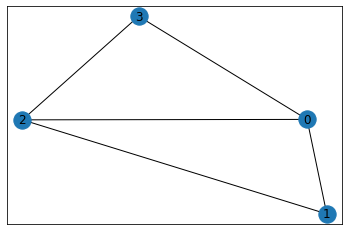

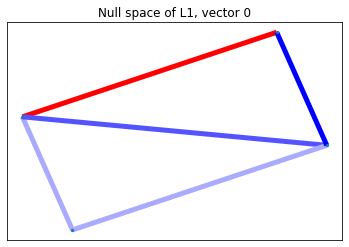

In [115]:

savename='abs'
G=nx.cycle_graph(4)
G.add_edge(0,2)
plt.figure()
nx.draw_networkx(G)
plt.show()

Gsc = SimplicialComplex(graph=G, faces=[[0,1,2]])

pos = nx.spring_layout(G,)

# plt.savefig(savename+'.pdf',format='pdf')

Null_Space_Plot(Gsc,G,pos,savename)


In [120]:
initial_phase = np.random.random(Gsc.n_edges)
grad_subspace, curl_subspace, harm_subspace = get_subspaces(Gsc)


In [119]:
np.random.seed(42)

np.random.random(Gsc.n_edges)


array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864])

In [121]:
alpha_1 = np.random.normal(0,1,Gsc.n_edges)
alpha_1 = alpha_1 + harm_subspace.T
#alpha_1 = alpha_1.tolist()
alpha_1 = alpha_1.tolist()[0]
alpha_2 = 0

In [122]:
sigmas = np.logspace(-2, 1, 100)

results = scan_sigma_parameters(Gsc,sigmas = sigmas, alpha1=alpha_1, alpha2=alpha_2,t_max=1000)

100%|██████████| 100/100 [03:10<00:00,  1.90s/it]


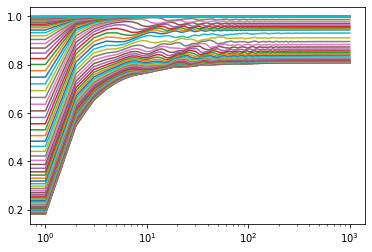

In [123]:
plt.figure()
order = []
for i in range(len(results)):
    
    result = results[i][0]
    sigma = sigmas[i]
    
    global_order = compute_simplicial_order_parameter(result.y, harm_subspace)

    plt.plot(result.t, global_order)
    order.append(np.mean(global_order[-10:]))

plt.xscale('log')
plt.savefig('sync_time_sigma_alpha1_noise.png')

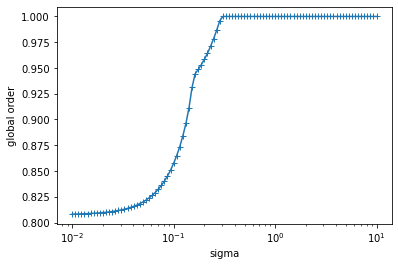

In [124]:
plt.plot(sigmas,order,'-+')
plt.xscale('log')
plt.xlabel('sigma')
plt.ylabel('global order')
plt.savefig('sigma_vs_hop.png')


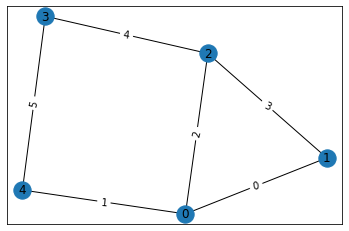

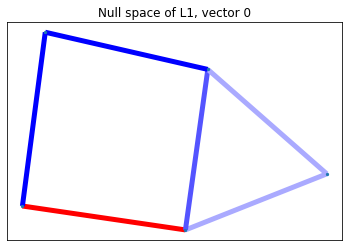

In [128]:
G=nx.Graph()

G.add_edge(0,1,weight=1,edge_com=0)
G.add_edge(1,2,weight=1,edge_com=0)
G.add_edge(2,3,weight=1,edge_com=0)
G.add_edge(3,4,weight=1,edge_com=0)
G.add_edge(4,0,weight=1,edge_com=0)
# G.add_edge(5,0,weight=1,edge_com=0)

G.add_edge(2,0,weight=1,edge_com=0)

node_com_dict=dict(zip(list(np.linspace(0,5,6).astype(int)),[0,0,0,0,0,0]))
nx.set_node_attributes(G, node_com_dict, "node_com")

edge_community_assignment=np.array(list(nx.get_edge_attributes(G,'edge_com').values()))

Gsc=SimplicialComplex(graph=G, no_faces=False)

# plt.figure()
# nx.draw_networkx(G)
# plt.show()
pos = nx.spring_layout(G,)
plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), d) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G,pos=pos)

Null_Space_Plot(Gsc,G,pos,savename)


initial_phase = np.random.random(Gsc.n_edges)
grad_subspace, curl_subspace, harm_subspace = get_subspaces(Gsc)


In [129]:
alpha_1 = np.random.normal(0,1,Gsc.n_edges)
alpha_1 = alpha_1 + harm_subspace.T
#alpha_1 = alpha_1.tolist()
alpha_1 = alpha_1.tolist()[0]
alpha_2 = 0

In [130]:
sigmas = np.logspace(-2, 1, 100)

results = scan_sigma_parameters(Gsc,sigmas = sigmas, alpha1=alpha_1, alpha2=alpha_2,t_max=1000)

100%|██████████| 100/100 [10:52<00:00,  6.52s/it]


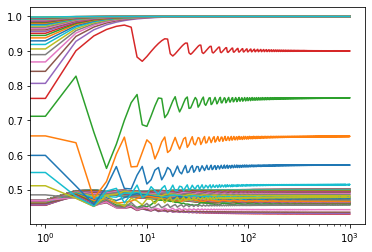

In [131]:
plt.figure()
order = []
for i in range(len(results)):
    
    result = results[i][0]
    sigma = sigmas[i]
    
    global_order = compute_simplicial_order_parameter(result.y, harm_subspace)

    plt.plot(result.t, global_order)
    order.append(np.mean(global_order[-10:]))

plt.xscale('log')
plt.savefig('sync_time_sigma_alpha1_noise2.png')

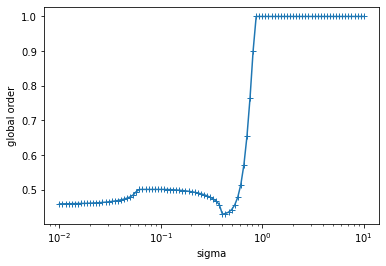

In [132]:
plt.plot(sigmas,order,'-+')
plt.xscale('log')
plt.xlabel('sigma')
plt.ylabel('global order')
plt.savefig('sigma_vs_hop2.png')


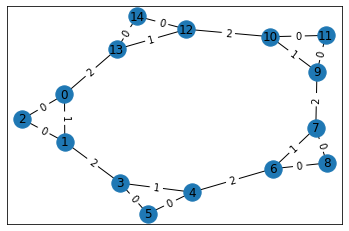

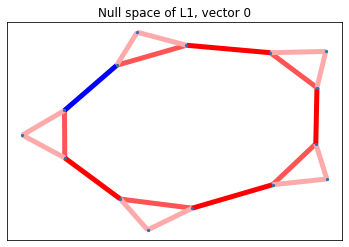

In [137]:
G = ring_of_rings(5, 3, 1)
savename = 'abc'
edge_community_assignment = []
for node1, node2, data in G.edges.data():
    edge_community_assignment.append(data['community_sync'])

Gsc = SimplicialComplex(graph=G, no_faces=False)

pos = nx.spring_layout(G,)
plt.figure()
nx.draw_networkx_nodes(G, pos=pos)
edge_labels = dict(((u, v), edge_community_assignment[d]) for d, (u, v) in enumerate(G.edges))                                                                                                                                                                                                                                         
node_labels = dict((u, d) for d, u in enumerate(G.nodes))                                                                                                                                                                                                                                                   
_=nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)  
_=nx.draw_networkx_labels(G, pos=pos, labels=node_labels)
_=nx.draw_networkx_edges(G,pos=pos)
plt.savefig('rotr_graph.png')

# plt.savefig(savename+'.pdf',format='pdf')



Null_Space_Plot(Gsc,G,pos,savename)

In [138]:
initial_phase = np.random.random(Gsc.n_edges)
grad_subspace, curl_subspace, harm_subspace = get_subspaces(Gsc)

alpha_1 = np.random.normal(0,1,Gsc.n_edges)
alpha_1 = alpha_1 + harm_subspace.T
#alpha_1 = alpha_1.tolist()
alpha_1 = alpha_1.tolist()[0]
alpha_2 = 0

sigmas = np.logspace(-2, 1, 100)

results = scan_sigma_parameters(Gsc,sigmas = sigmas, alpha1=alpha_1, alpha2=alpha_2,n_t=1000,t_max=4000)

  4%|▍         | 4/100 [12:58<5:11:14, 194.53s/it] 


KeyboardInterrupt: 

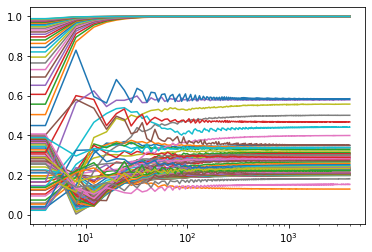

In [113]:
plt.figure()
order = []
variance = []
for i in range(len(results)):
    
    result = results[i][0]
    sigma = sigmas[i]
    
    global_order = compute_simplicial_order_parameter(result.y, harm_subspace)

    plt.plot(result.t, global_order)
    order.append(np.mean(global_order[-10:]))
    variance.append(np.std(global_order[-100:]))

plt.xscale('log')
plt.savefig('rotr_sync_time_sigma_alpha1_noise.png')

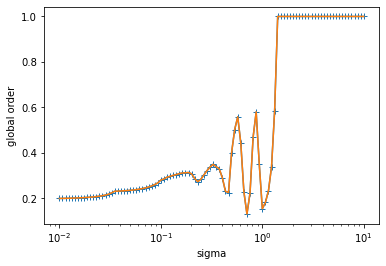

In [114]:
plt.plot(sigmas,order,'-+')
plt.errorbar(sigmas,order, variance,)
plt.xscale('log')
plt.xlabel('sigma')
plt.ylabel('global order')
plt.savefig('sigma_vs_hop.png')
